In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# 1.Load the dataset

In [2]:
df = pd.read_csv('Global_Education.csv', encoding='ISO-8859-1')

# Display first 5 rows
df.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


# 2. Data Exploration and Cleaning

In this step, we will look at the structure of our dataset, check for missing values, and correct any anomalies we might find. This ensures our data is clean and ready for analysis.

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Since calculating the median for non-numeric columns causes an error, 
# we only select numeric columns to calculate the median and fill missing values.
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify if there are any missing values left in numeric columns
df[numeric_cols].isnull().sum()

Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficiency_Reading    0
Lower_Secondary_End_Proficiency_Math       0
Youth_15_2

# 3. Calculating Gender Disparity

Now, we will calculate the gender disparity in primary education. Gender disparity shows the difference between males and females in various educational indicators. Here, we choose to focus on the literacy rate among youth aged 15-24 as our indicator of gender disparity.


In [4]:
# Calculate gender disparity in youth literacy rates
df['Gender_Disparity_Youth_Literacy'] = df['Youth_15_24_Literacy_Rate_Male'] - df['Youth_15_24_Literacy_Rate_Female']

# Display the new column
df[['Countries and areas', 'Gender_Disparity_Youth_Literacy']].head()

,Countries and areas,Gender_Disparity_Youth_Literacy
0,Afghanistan,18
1,Albania,-1
2,Algeria,1
3,Andorra,0
4,Angola,0


# 4. Exploratory Data Analysis (EDA)

In this section, we'll explore our data to uncover any interesting insights, focusing on gender disparity and its relation to two other variables. Let's look at how gender disparity in youth literacy rates relates to the gross primary education enrollment and the unemployment rate.


In [5]:
# Summary statistics of key variables
df[['Gender_Disparity_Youth_Literacy', 'Gross_Primary_Education_Enrollment', 'Unemployment_Rate']].describe()

,Gender_Disparity_Youth_Literacy,Gross_Primary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000
mean,0.717822,94.942574,6.000000
std,3.661631,29.769338,5.273136
min,-5.000000,0.000000,0.000000
25%,0.000000,97.200000,2.302500
50%,0.000000,101.850000,4.585000
75%,0.000000,107.300000,8.655000
max,27.000000,142.500000,28.180000


# Visualizing the relationship between gender disparity in youth literacy and gross primary education enrollment

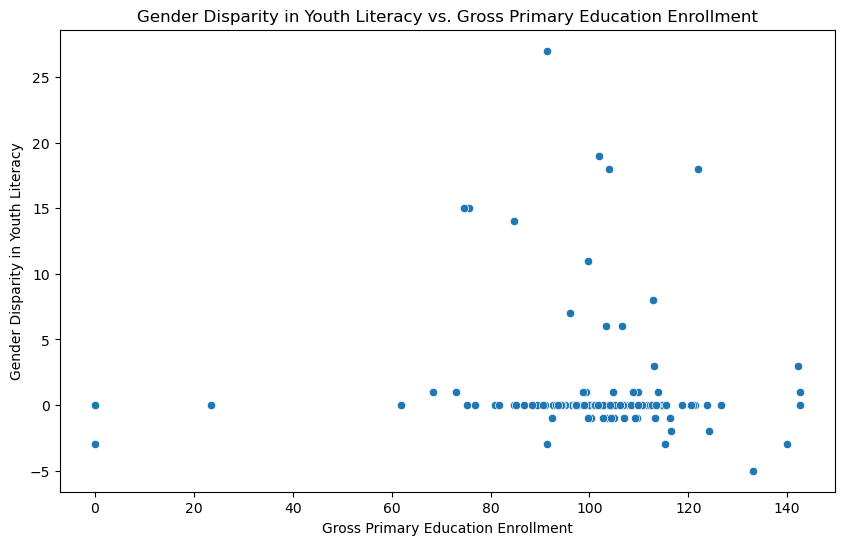

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross_Primary_Education_Enrollment', y='Gender_Disparity_Youth_Literacy', data=df)
plt.title('Gender Disparity in Youth Literacy vs. Gross Primary Education Enrollment')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Gender Disparity in Youth Literacy')
plt.show()

# What the Scatter Plot Shows Us
This picture with dots shows us how the differences in learning between boys and girls (we call this gender disparity) are related to how many kids go to school (this is the Gross Primary Education Enrollment). Each dot is a different country.

## What We See
- Most of the dots are close to the line at zero, which means in a lot of countries, boys and girls are equally likely to know how to read and write.
- Some dots are higher up, which means in those countries, there are more boys or more girls who are not learning to read and write.
- The dots are spread out left to right, which tells us that the number of kids going to school in each country can be very different.

## What This Means
It seems like there isn't a clear pattern that shows countries with more kids in school have smaller differences between boys and girls in learning. But, there are a few countries where the difference is quite big, and it would be interesting to learn more about them.

# Visualizing the relationship between gender disparity in youth literacy and unemployment rate

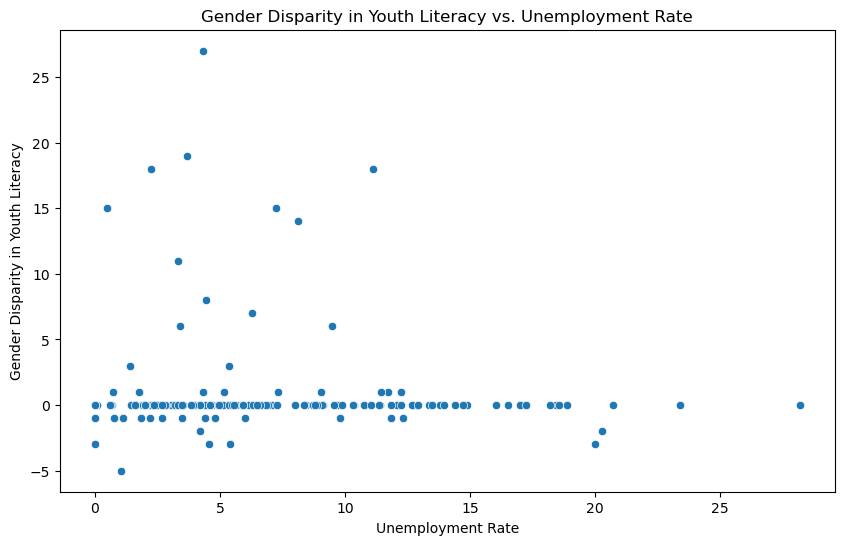

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment_Rate', y='Gender_Disparity_Youth_Literacy', data=df)
plt.title('Gender Disparity in Youth Literacy vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Gender Disparity in Youth Literacy')
plt.show()

# Looking at the Dots and What They Tell Us
This graph is also made of dots, and it helps us understand if there's a link between how equal boys' and girls' learning is (gender disparity in youth literacy) and how many people can't find jobs (the unemployment rate).

## Observations
- Again, lots of dots are close to zero, so for many countries, the learning is pretty equal, and it doesn't seem to change much no matter if more or less people can't find jobs.
- There are some countries where the learning is not equal, but this doesn't seem to be connected to whether there are more or fewer jobs.

## Conclusions
It doesn't look like there's a strong connection between the differences in boys' and girls' learning and the number of people who don't have jobs in these countries. But it's still good to remember that just because we don't see a connection here, it doesn't mean there isn't one. Maybe there are other things we would need to look at too.

# Distribution of gender disparity in youth literacy

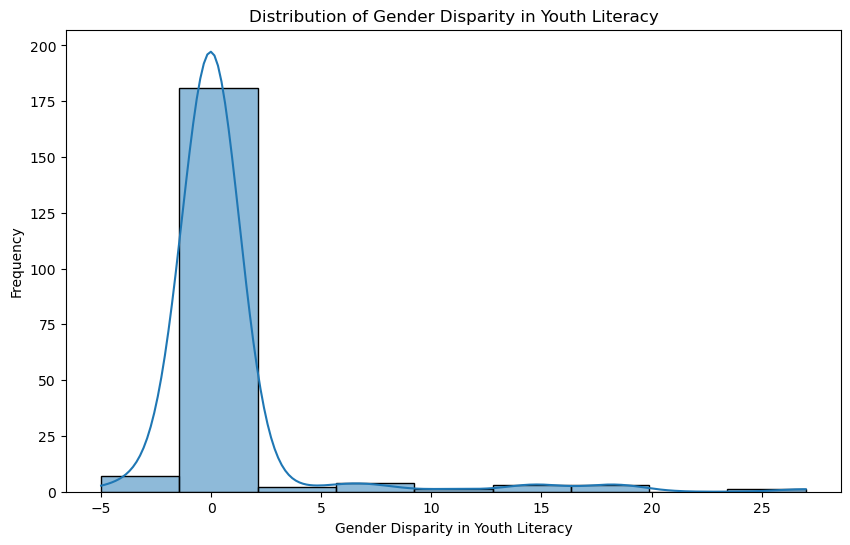

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Gender_Disparity_Youth_Literacy'], kde=True)
plt.title('Distribution of Gender Disparity in Youth Literacy')
plt.xlabel('Gender Disparity in Youth Literacy')
plt.ylabel('Frequency')
plt.show()

# What the Histogram Teaches Us
This tall bar graph shows us how common different levels of gender disparity in youth literacy are around the world. Each bar tells us how many countries have that level of difference in learning between boys and girls.

## Key Points
- Most of the bars are near the center at zero, which means that in most places, boys and girls can read and write equally well.
- There are only a few places where the bars are taller further away from zero, so only a few countries have a big difference in learning between boys and girls.

## What We Learn From This
Most countries are doing pretty well in making sure boys and girls have the same chances to learn to read and write. That's really good news! But there are still some places where they need to work on this, and those are the places with the tall bars away from zero.

# Distribution of Gross Primary Education Enrollment

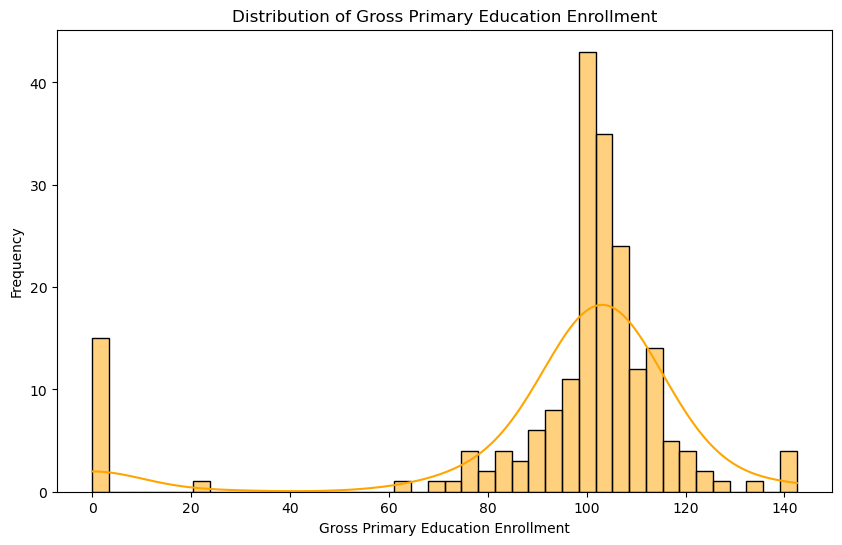

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Gross_Primary_Education_Enrollment'], kde=True, color='orange')
plt.title('Distribution of Gross Primary Education Enrollment')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Frequency')
plt.show()

# Bars and Learning About School Enrollment
This bar graph with a line on it shows us how many kids are going to school in different countries (this is Gross Primary Education Enrollment).

## What Stands Out
- There's one big tall bar, which means a lot of countries have a similar number of kids in school.
- The bars go down as they move further right, telling us fewer countries have really high numbers of kids in school.

## Understanding the Graph
It looks like most countries have a good number of kids in school, but not all countries are the same. Some are really great at getting kids to school, while others might need to find ways to get more kids learning.

# Distribution of Unemployment Rate

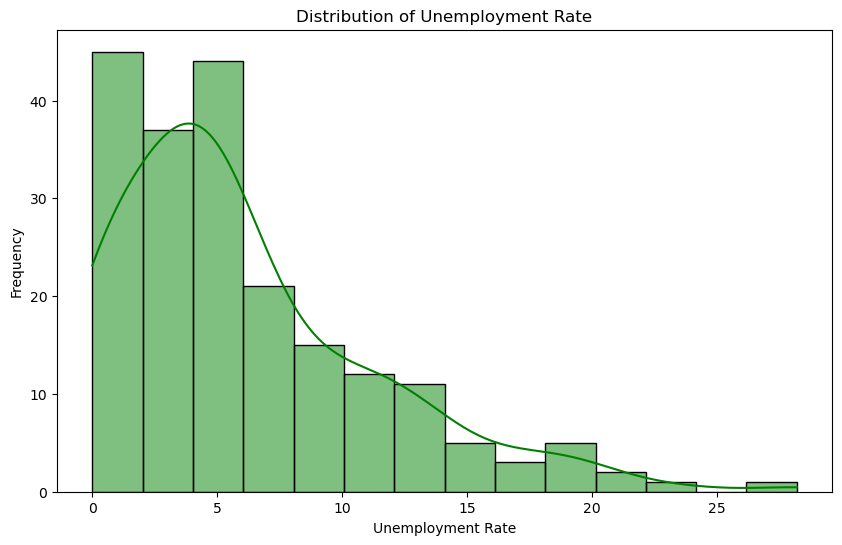

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Unemployment_Rate'], kde=True, color='green')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

# Bars Showing Us About Jobs
This last bar graph helps us understand how many people in different countries can't find jobs (this is the unemployment rate).

## Insights
- The tallest bars are on the left, meaning most countries have lower numbers of people without jobs.
- As we look to the right, the bars get shorter, which tells us there are fewer countries where a lot of people can't find work.

## Thinking About What It Means
Most countries have a lower number of people who can't find jobs, which is a good thing. But, there are still some countries with high unemployment, and it would be important to understand why that's happening.

# 5. Hypothesis Formulation

We've seen some interesting things in the graphs, and they made us think about a guess we can check:

"Our guess is: Countries where there's a bigger difference in the number of boys and girls finishing lower secondary education might also have a bigger difference in how many boys and girls can read and write when they're young adults."

This hypothesis is worth exploring because if we find that places with more gender disparity in school completion also have more gender disparity in literacy, it might mean that keeping both girls and boys in school longer could help everyone to read and write better.

## Testing the Hypothesis

In [11]:
# Calculate gender disparities
df['Gender_Disparity_Lower_Secondary_Completion'] = df['Completion_Rate_Lower_Secondary_Male'] - df['Completion_Rate_Lower_Secondary_Female']
df['Gender_Disparity_Youth_Literacy'] = df['Youth_15_24_Literacy_Rate_Male'] - df['Youth_15_24_Literacy_Rate_Female']

# Calculate the Pearson Correlation Coefficient and the P-value for the hypothesis
correlation_completion_literacy, p_value_completion_literacy = stats.pearsonr(df['Gender_Disparity_Lower_Secondary_Completion'], df['Gender_Disparity_Youth_Literacy'])

# Display the results for the hypothesis
print(f"Correlation between gender disparity in lower secondary completion and youth literacy rates: {correlation_completion_literacy}, P-value: {p_value_completion_literacy}")


Correlation between gender disparity in lower secondary completion and youth literacy rates: 0.479321100129262, P-value: 5.32800947636031e-13


# Exploring the Link Between School Completion and Literacy

We had a theory: If there's a big gap in the number of boys versus girls who finish middle school, there might also be a big difference in their ability to read and write as young adults.

The numbers are in, and they tell an interesting story. We used a statistical method called correlation to see if these two things — school completion and literacy rates among 15 to 24-year-olds — move together. And it turns out, they do.

The correlation number we got is 0.479. This number can range from -1 to 1, where 0 means no relationship, and 1 means a perfect relationship. Our number is closer to 0.5, which shows us that there's a moderate and positive connection. As the difference in school completion rates between boys and girls increases, the difference in their literacy rates tends to increase too.

But how sure are we? The p-value, which tells us if what we’re seeing is real or just by chance, is incredibly small (those e-13 numbers mean it’s really, really small). This tiny p-value gives us confidence that the link we’ve found isn't just a fluke.

In simpler terms, we have strong evidence that to help more young people become good at reading and writing, encouraging both boys and girls to stay in school and graduate could be key. This discovery underlines the importance of equal education opportunities for all genders — it can truly shape the literacy of the next generation.

# 6. Linear Regression Analysis:

In [12]:
# Prepare the data for the regression model
X = df[['Gender_Disparity_Lower_Secondary_Completion']]  # Predictor variable
y = df['Gross_Primary_Education_Enrollment']  # Response variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Fit the model on the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

In [14]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 756.6231490488949
R-squared: -0.018210174137885504


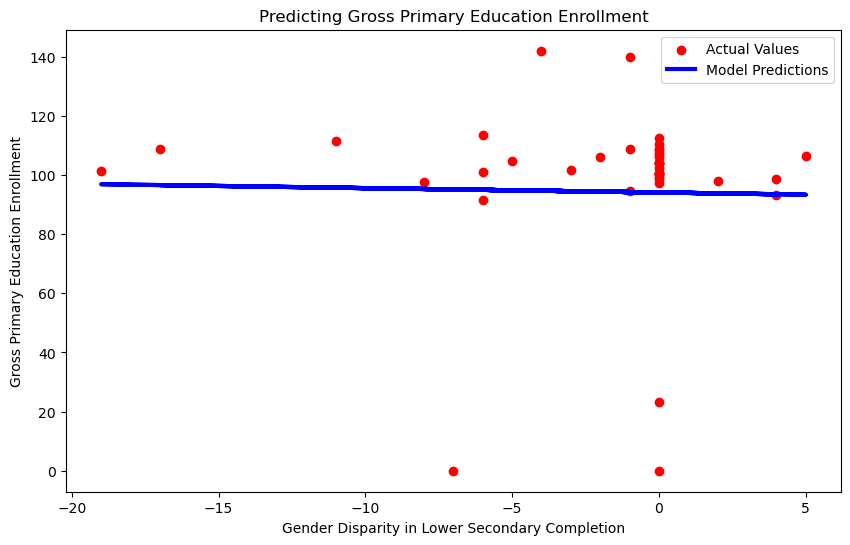

In [15]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual Values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Model Predictions')
plt.title('Predicting Gross Primary Education Enrollment')
plt.xlabel('Gender Disparity in Lower Secondary Completion')
plt.ylabel('Gross Primary Education Enrollment')
plt.legend()
plt.show()

# 7. Correlation analysis

Gross_Tertiary_Education_Enrollment            1.000000
Lower_Secondary_End_Proficiency_Math           0.752771
Lower_Secondary_End_Proficiency_Reading        0.735815
Latitude                                       0.578970
Grade_2_3_Proficiency_Reading                  0.433602
Grade_2_3_Proficiency_Math                     0.406779
Primary_End_Proficiency_Math                   0.310987
Gross_Primary_Education_Enrollment             0.283959
Primary_End_Proficiency_Reading                0.235254
Unemployment_Rate                              0.140702
Youth_15_24_Literacy_Rate_Female               0.043842
Completion_Rate_Upper_Secondary_Female         0.037310
Youth_15_24_Literacy_Rate_Male                 0.028501
Completion_Rate_Upper_Secondary_Male           0.004151
Completion_Rate_Lower_Secondary_Female        -0.059512
Completion_Rate_Lower_Secondary_Male          -0.082024
Longitude                                     -0.092477
Gender_Disparity_Lower_Secondary_Completion   -0

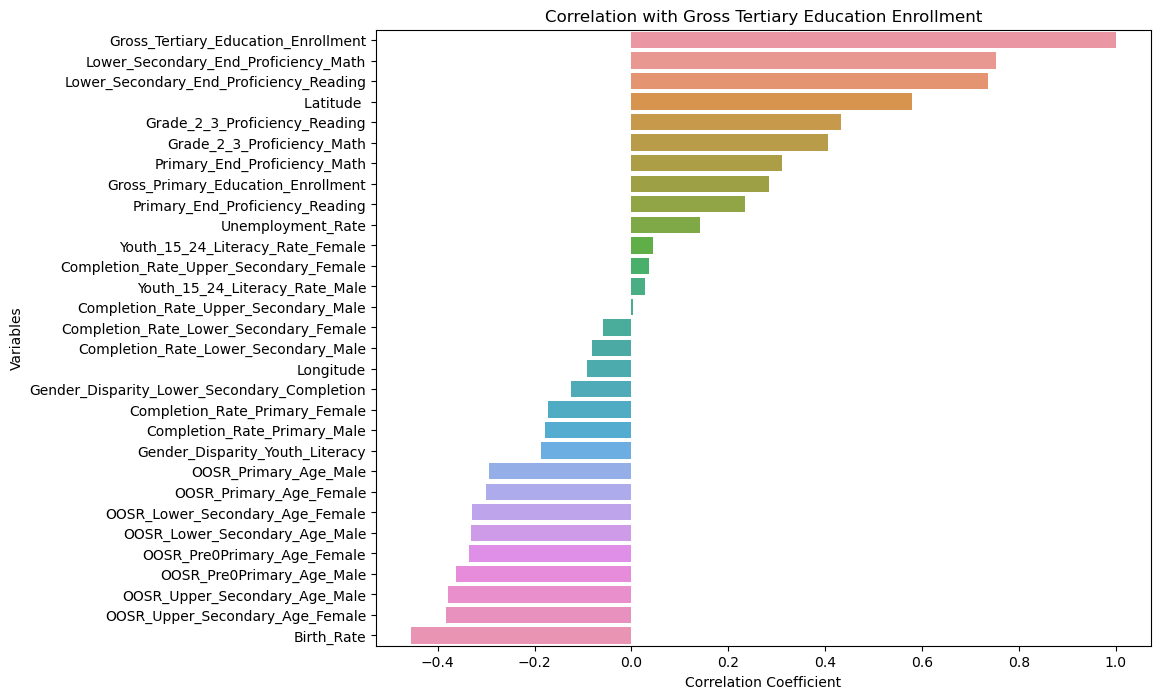

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# If interested in 'Gross_Tertiary_Education_Enrollment'
print(correlation_matrix['Gross_Tertiary_Education_Enrollment'].sort_values(ascending=False))
correlations = correlation_matrix['Gross_Tertiary_Education_Enrollment'].sort_values(ascending=False)

# Visualizing the correlation using a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation with Gross Tertiary Education Enrollment')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

After evaluating the correlations among various educational and socio-economic indicators, we chose Gross Tertiary Education Enrollment as our focus for further analysis. The reason for this selection is its strong positive correlation with other significant educational outcomes, such as Lower_Secondary_End_Proficiency_Math and Lower_Secondary_End_Proficiency_Reading. This high correlation suggests that tertiary education enrollment might be a key factor influencing or reflecting broader educational achievements within a country.

# 8. Classification

Decision Tree - Accuracy: 1.0
Decision Tree - Precision: 1.0
Decision Tree - Recall: 1.0
Decision Tree - F1-Score: 1.0
Random Forest - Accuracy: 0.9512195121951219
Random Forest - Precision: 0.9409722222222222
Random Forest - Recall: 0.957516339869281
Random Forest - F1-Score: 0.9463458110516934


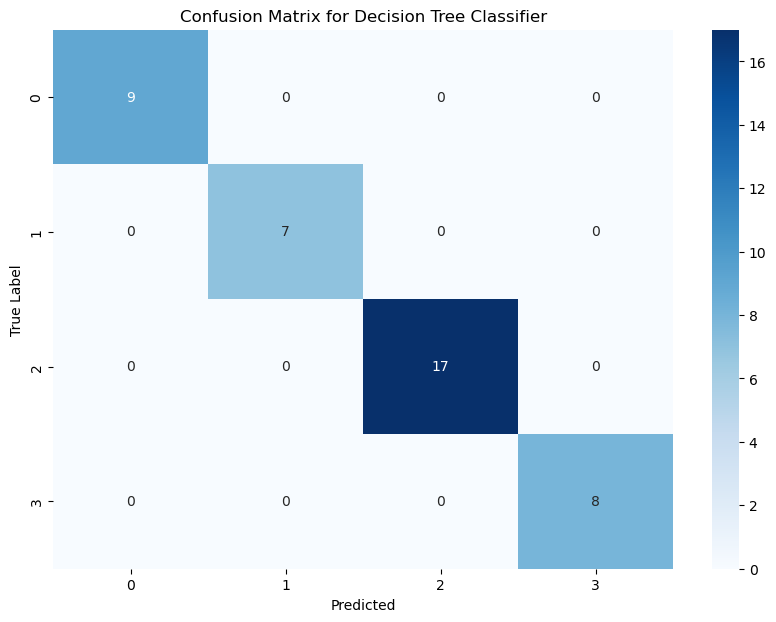

In [29]:
df['Birth_Rate_Categories'] = pd.qcut(df['Birth_Rate'], q=4, labels=False)
encoder = LabelEncoder()
df['Birth_Rate_Categories'] = encoder.fit_transform(df['Birth_Rate_Categories'])

features = df.select_dtypes(include=[np.number]).columns.tolist()
features.remove('Birth_Rate_Categories')  
# features = ['Lower_Secondary_End_Proficiency_Math', 'Lower_Secondary_End_Proficiency_Reading', 'Latitude ', 'Grade_2_3_Proficiency_Reading']
X = df[features]
y = df['Birth_Rate_Categories']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initializing and training models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Making predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Re-evaluating models
models = {'Decision Tree': dt_predictions, 'Random Forest': rf_predictions}
for model_name, predictions in models.items():
    print(f"{model_name} - Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"{model_name} - Precision: {precision_score(y_test, predictions, average='macro')}")
    print(f"{model_name} - Recall: {recall_score(y_test, predictions, average='macro')}")
    print(f"{model_name} - F1-Score: {f1_score(y_test, predictions, average='macro')}")


cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# 9. K-means clustering

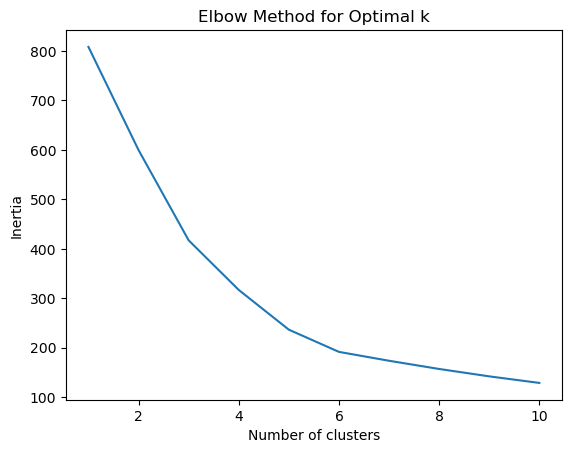

In [19]:
df['Average_Youth_Literacy_Rate'] = (df['Youth_15_24_Literacy_Rate_Male'] + df['Youth_15_24_Literacy_Rate_Female']) / 2

# Preparing data for clustering
features = df[['Gross_Primary_Education_Enrollment', 'Unemployment_Rate', 'Gross_Tertiary_Education_Enrollment', 'Average_Youth_Literacy_Rate']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Finding the optimal number of clusters (Elbow Method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42) 
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

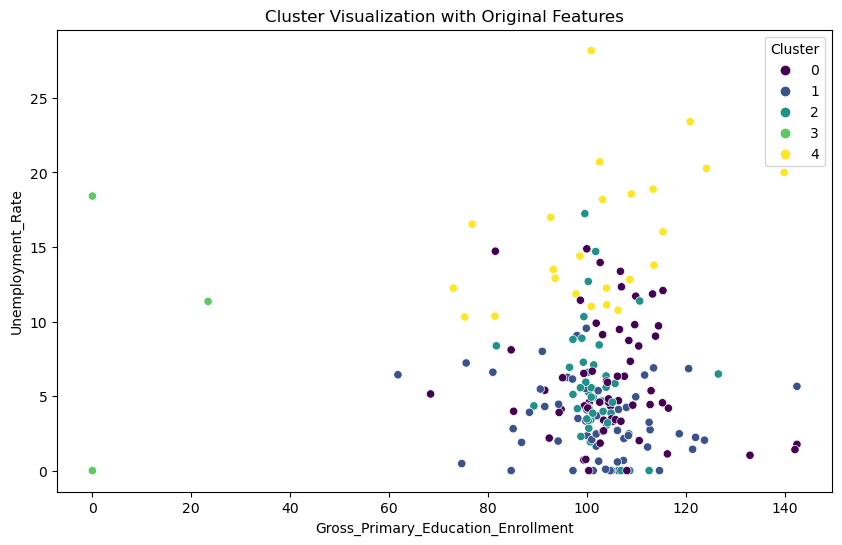

In [31]:
# Apply K-Means with the optimal number of clusters found
optimal_clusters = 5 
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)  
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster information to the dataframe
df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gross_Primary_Education_Enrollment', y='Unemployment_Rate', hue='Cluster', palette='viridis', legend='full')
plt.title('Cluster Visualization with Original Features')
plt.show()

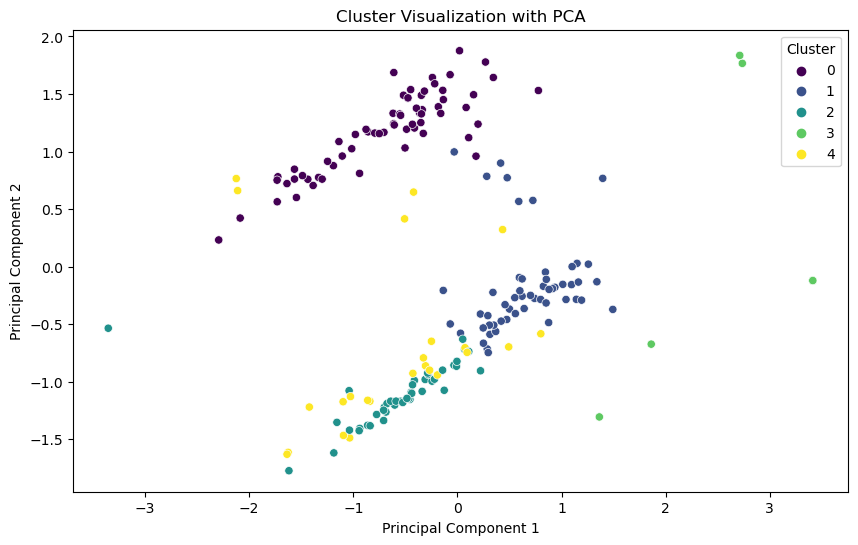

In [21]:
from sklearn.decomposition import PCA

# Applying PCA to reduce data to two dimensions
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Adding PCA components to the dataframe for visualization
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# Scatter plot of the two principal components with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', legend='full')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
